# Применение алгоритма Гэйла-Шепли для решения задачи о назначении локомотивов на поезда

## Теория

### Текущая реализация: задача о назначениях (алгоритм аукционов)

### Предлагаемая реализация: задача о стабильных мэтчингах (алгоритм Гэйла-Шепли)

## Сравнение алгоритмов

### Реализация алгоритма Гэйла-Шепли

In [331]:
import numpy as np
def marraige_print(str, verbose):
    if verbose == True:
        print(str)

def get_marriage(array1, array2, array_type='util', verbose=False):
    if array_type == 'util':
        man_prefs = np.argsort(-array1)
        woman_prefs = np.argsort(-array2)
    else:
        man_prefs = array1
        woman_prefs = array2
        
    #marraige_print('Man prefs:\n %s' % man_prefs, verbose)
    #marraige_print('Woman prefs:\n %s' % woman_prefs, verbose)
    #marraige_print('---------', verbose)

    man_number = man_prefs.shape[0]
    woman_number = woman_prefs.shape[0]
    last_choices_indexes = [-1] * man_number
    woman_choices = [-1] * woman_number
    woman_accept = [-1] * woman_number
    
    while -1 in woman_accept: 
        last_choices = [-1] * man_number
        for man in range(0, man_number):
            if man not in woman_accept:
                last_choices_indexes[man] = last_choices_indexes[man] + 1
            last_choices[man] = man_prefs[man][last_choices_indexes[man]]
        choices_tuple = [(w, last_choices[w]) for w in range(0, len(last_choices))]
        #marraige_print('last choices: %s, choices_tuple: %s' % (last_choices, choices_tuple), verbose)
        curr_woman_accept = np.copy(woman_accept)
        for (man, woman) in choices_tuple:
            if man not in curr_woman_accept:
                curr_woman_prefs = woman_prefs[woman]
                #marraige_print('check man %d, woman %d' % (man, woman), verbose)
                #marraige_print('woman prefs for woman %d: %s' % (woman, curr_woman_prefs), verbose)
                curr_woman_choice = woman_choices[woman]
                #marraige_print('current choice of woman %d: %d' % (woman, curr_woman_choice), verbose)
                if curr_woman_choice == -1:
                    woman_choices[woman] = man
                    woman_accept[woman] = man
                elif np.where(curr_woman_prefs == man)[0][0] < np.where(curr_woman_prefs == curr_woman_choice)[0][0]:
                    woman_choices[woman] = man
                    woman_accept[woman] = man
                else:
                    woman_choices[woman] = curr_woman_choice           

                #marraige_print('new choice of woman %d: %d' % (woman, choices2[woman]), verbose)

        #marraige_print('woman accept: %s' % woman_accept, verbose)
        #marraige_print('---------', verbose)

    return woman_accept, list(range(0, len(woman_accept)))

### Сравнение скорости работы

In [332]:
from scipy.optimize import linear_sum_assignment
for size in [5, 10, 25, 50, 100]:
    print('Size', size)
    %timeit linear_sum_assignment(-np.random.rand(size, size))
    %timeit get_marriage(np.argsort(-np.random.rand(size, size)), np.argsort(-np.random.rand(size, size)), array_type='pref')  

Size 5
1000 loops, best of 3: 651 µs per loop
1000 loops, best of 3: 211 µs per loop
Size 10
1000 loops, best of 3: 1.57 ms per loop
1000 loops, best of 3: 679 µs per loop
Size 25
The slowest run took 15.09 times longer than the fastest. This could mean that an intermediate result is being cached 
100 loops, best of 3: 5.88 ms per loop
100 loops, best of 3: 3.57 ms per loop
Size 50
The slowest run took 12.94 times longer than the fastest. This could mean that an intermediate result is being cached 
1 loops, best of 3: 21.4 ms per loop
100 loops, best of 3: 16.3 ms per loop
Size 100
10 loops, best of 3: 68.6 ms per loop
10 loops, best of 3: 75 ms per loop


### Сравнение полезностей решений

In [333]:
cost = np.random.rand(4, 4)
print('Util matrix:\n', cost)
row_ind, col_ind = linear_sum_assignment(-cost)
print('Assignment problem solution:', list(zip(row_ind, col_ind)))
ass_util = cost[row_ind, col_ind].sum()
print('Assignment util:', ass_util)

mar_row, mar_col = get_marriage(cost, np.transpose(cost))
print('Marriage problem solution:', list(zip(mar_row, mar_col)))
mar_util = cost[mar_row, mar_col].sum()
print('Marriage util:', mar_util)
print('Ratio marriage/assignment =', mar_util / ass_util)

Util matrix:
 [[ 0.79479449  0.32242699  0.38198306  0.35119844]
 [ 0.22089633  0.4740585   0.81575508  0.04707789]
 [ 0.46784804  0.17332245  0.18315568  0.56615277]
 [ 0.27195503  0.25429705  0.28584431  0.17059096]]
Assignment problem solution: [(0, 0), (1, 2), (2, 3), (3, 1)]
Assignment util: 2.43099939423
Marriage problem solution: [(0, 0), (3, 1), (1, 2), (2, 3)]
Marriage util: 2.43099939423
Ratio marriage/assignment = 1.0


In [334]:
ratios = []
for i in range(0, 100):
    cost = np.random.rand(25, 25)
    row_ind, col_ind = linear_sum_assignment(-cost)
    ass_util = cost[row_ind, col_ind].sum()

    mar_row, mar_col = get_marriage(cost, np.transpose(cost))
    mar_util = cost[mar_row, mar_col].sum()
    ratio = mar_util / ass_util
    ratios.append(ratio)
    
print('Score = %.4f +/- %.4f' % (np.mean(ratios), np.std(ratios)))

Score = 0.9508 +/- 0.0153


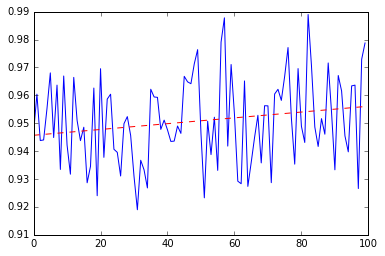

In [335]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(0, 100)
y = ratios
plt.plot(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),"r--")

plt.show()

## Выводы

1. Теоретическая сложность ЗН больше, чем ЗГШ ($O(n^3)$ против $O(n^2)$). Это можно увидеть на примерах выше. То, что при увеличении размеров матрицы времена работы сравниваются, можно объяснить тем, что метод решения ЗН взят из библиотеки scipy, где код хорошо оптимизирован, а алгоритм ГШ реализован "на коленке" без оптимизаций. К сожалению, не удалось найти реализованный алгоритм ГШ в известных математических библиотеках (в интернете есть только "любительские" реализации, сопоставимые по скорости работы с моей).
2. Главное преимущество алгоритма ГШ заключается в том, что он позволяет разделить полезность поездов и локомотивов. Есть случаи, когда какое-то назнчение оказывается хорошим для поезда и плохим для локомотива. Для решения ЗН приходится считать единую функцию полезности, которая будет как бы усреднять выгоду для поездов и локомотивов. В ЗГШ можно отдельно составить матрицу предпочтений поездов и матрицу предпочтений локомотивов. Далее, можно делать переключение, чему давать предпочтение - поездам или локомотивам. В зависимости от этого решение будет искаться "от лица" нужной сущности и будет гарантировано, что для данной сущности найденное решение -- наилучшее.
3. Чаще всего стабильное оптимальное решение с точки зрения ЗГШ не является оптимальным для ЗН с теми же входными данными. Это связано как раз с тем, что ЗГШ решается из предположения предпочтения одной сущности (поездов или локомотивов). Моделирование показывает, что суммарная полезность решений ЗГШ составляет не меньше 0.9 от оптимального решения ЗН, что является вполне приемлемым. С ростом размерности матрицы полезностей (до 50х50) разброс отклонений уменьшается (0.95...0.98).
4. Задачу ГШ можно модифицировать, чтобы разрешать некоторые поезда (локомотивы) оставлять неподвязанными, если выбранное назначение оказывается достаточно плохим. Это делается вставкой в нужное место в упорядоченный список предпочтений локомотивов для поезда элемента, который соответствует отсутствию назначения (пустое назначение). Например, можно так построить расчет функции полезности, что отрицательные значения будут считаться неприемлемыми.